<a href="https://colab.research.google.com/github/Avni222001/Basic-C-/blob/main/APR_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Download dataset automatically
!wget -O winequality-red.csv https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.decomposition import PCA
import joblib

# Step 3: Load dataset
df = pd.read_csv("winequality-red.csv", sep=";")   # UCI uses ';' as separator
df.head()


--2025-09-19 13:52:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [  <=>               ]  82.23K   274KB/s    in 0.3s    

2025-09-19 13:52:39 (274 KB/s) - ‘winequality-red.csv’ saved [84199]



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
import joblib
# load (if uploaded to Colab files area)
df = pd.read_csv('/content/winequality-red.csv', sep=';')  # or path in Drive
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


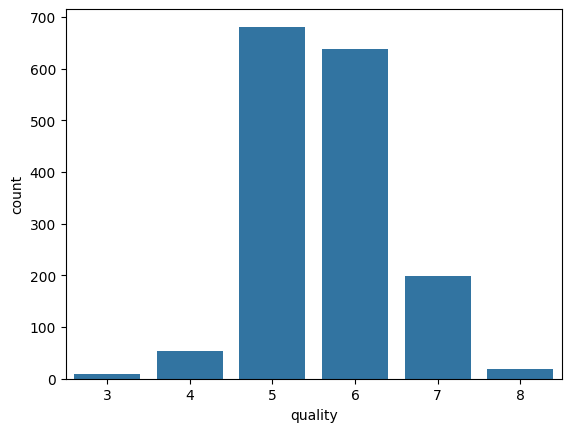

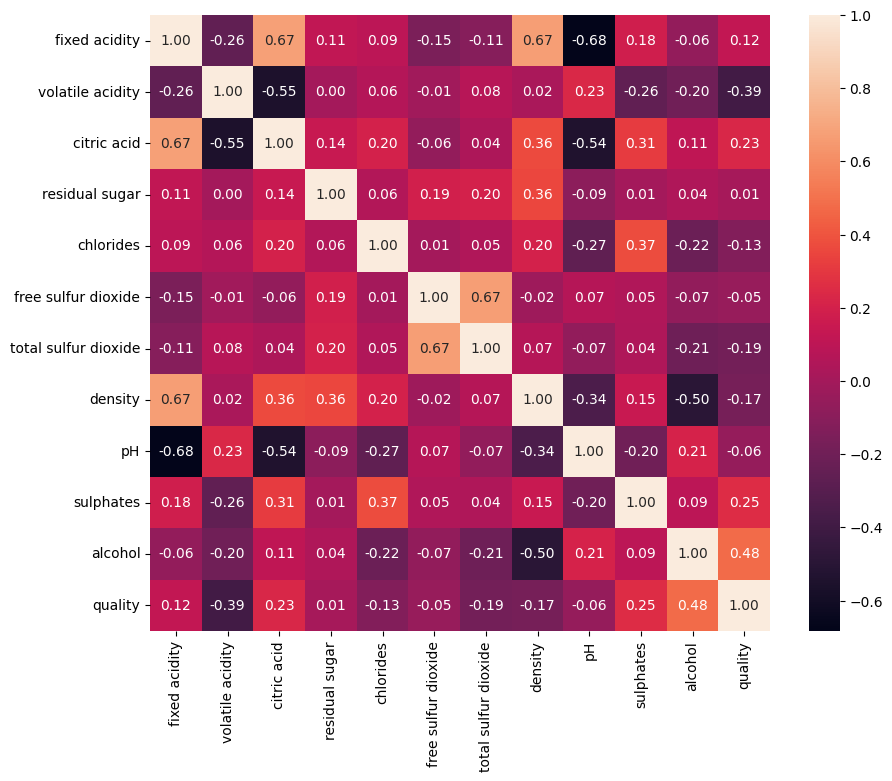

In [7]:
# distribution
plt.figure(); sns.countplot(x='quality', data=df); plt.savefig('quality_distribution.png', bbox_inches='tight')
# correlation
plt.figure(figsize=(10,8)); sns.heatmap(df.corr(), annot=True, fmt=".2f"); plt.savefig('correlation_heatmap.png', bbox_inches='tight')


In [8]:
df['label'] = (df['quality'] >= 6).astype(int)
print(df['label'].value_counts())
X = df.drop(['quality','label'], axis=1)
y = df['label']


label
1    855
0    744
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


Accuracy: 0.7458333333333333
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       223
           1       0.77      0.74      0.76       257

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



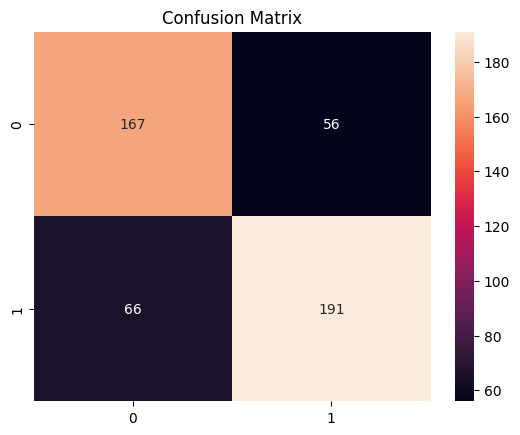

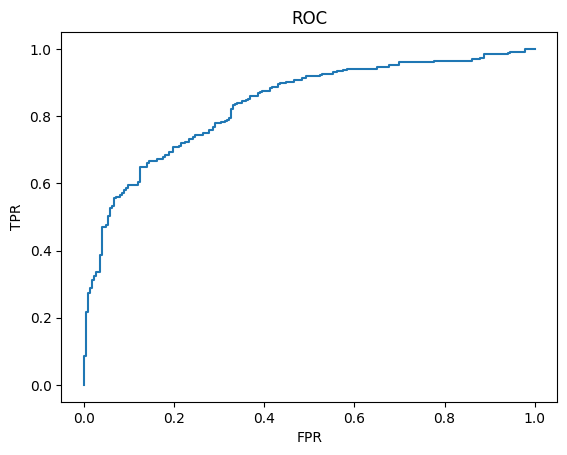

In [10]:
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_s, y_train)
y_pred = svm.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(); sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion Matrix'); plt.savefig('confusion_matrix.png', bbox_inches='tight')
# ROC
y_score = svm.decision_function(X_test_s)
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.figure(); plt.plot(fpr,tpr); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC'); plt.savefig('roc.png', bbox_inches='tight')


In [11]:
param_grid = {'C':[0.1,1,10], 'kernel':['rbf','linear'], 'gamma':['scale','auto']}
grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_s, y_train)
print("Best:", grid.best_params_)
best = grid.best_estimator_
yb = best.predict(X_test_s)
print(classification_report(y_test, yb))


Best: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       223
           1       0.77      0.74      0.76       257

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



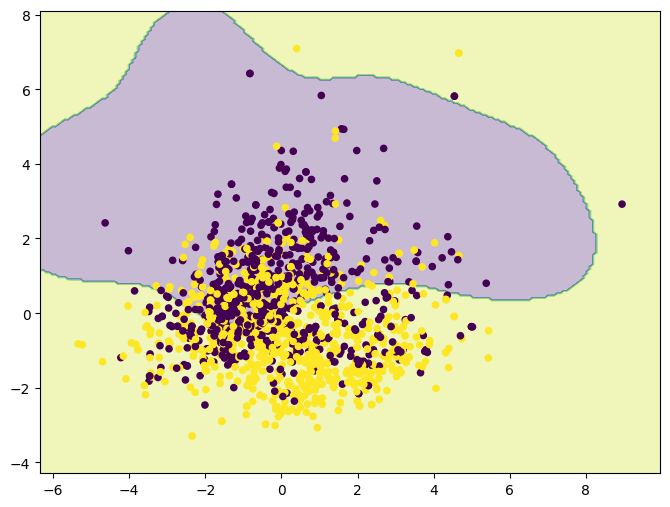

In [12]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(np.vstack([X_train_s, X_test_s]))
# split PCA arrays back
n_train = X_train_s.shape[0]
X_tr_p, X_te_p = X_pca[:n_train], X_pca[n_train:]
# train on PCA (for visualization only)
svm_pca = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_pca.fit(X_tr_p, y_train)
# plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 200),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 200))
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(8,6)); plt.contourf(xx,yy,Z,alpha=0.3); plt.scatter(X_pca[:,0], X_pca[:,1], c=np.concatenate([y_train, y_test]), s=20); plt.savefig('pca_svm.png', bbox_inches='tight')


In [13]:
joblib.dump(best, 'svm_wine_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']